In [17]:
# Load the Data and Train a Baseline Model

import pandas as pd

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score



# Load training and test datasets

train_data = pd.read_csv('/kaggle/input/dataset3/TRAIN.csv')

test_data = pd.read_csv('/kaggle/input/dataset3/TEST-Without TARGET.csv')





test_data.head()

#

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [18]:
len(test_data)

75818

In [19]:
test_data.fillna(test_data.mean(), inplace=True)

In [20]:
len(test_data)

75818

In [21]:
# Separate features and target

X = train_data.drop('TARGET', axis=1)

y = train_data['TARGET']



# Split data for training and validation

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



# Fit the baseline decision tree model

# dt_clf = DecisionTreeClassifier(class_weight='balanced',random_state=42)

# dt_clf.fit(X_train, y_train)

# y_pred = dt_clf.predict(X_val)

# print("Validation Accuracy:", accuracy_score(y_val, y_pred))



# # Predict on test set and prepare submission for Kaggle

# test_predictions = dt_clf.predict(test_data)

# submission = pd.DataFrame({'ID': test_data['ID'], 'TARGET': test_predictions})

# submission.to_csv('submission.csv', index=False)


In [22]:
# Step 3: Model Tuning with Different Parameters

dt_clf_depth = DecisionTreeClassifier(max_depth=10, random_state=42)

dt_clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

dt_clf_leaf = DecisionTreeClassifier(max_leaf_nodes=15, random_state=42)



models = [("Max Depth = 10", dt_clf_depth), ("Criterion = Gini", dt_clf_gini), ("Max Leaf Nodes = 15", dt_clf_leaf)]

results = {}



# for name, model in models:

#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_val)

#     accuracy = accuracy_score(y_val, y_pred)

#     results[name] = accuracy



# print("Model Tuning Results:")

# for model_name, acc in results.items():

#     print(f"{model_name}: Validation Accuracy = {acc}")



dt_clf_depth.fit(X_train, y_train)

y_pred_gini = dt_clf_depth.predict(X_val)

print("Validation Accuracy gini:", accuracy_score(y_val, y_pred_gini))



# Predict on test set and prepare submission for Kaggle

test_predictions = dt_clf_depth.predict(test_data)

submission = pd.DataFrame({'ID': test_data['ID'], 'TARGET': test_predictions})

submission.to_csv('submission2.csv', index=False)




Validation Accuracy gini: 0.9579715864246251


In [23]:
dt_clf_leaf.fit(X_train, y_train)

y_pred_leaf = dt_clf_leaf.predict(X_val)

print("Validation Accuracy gini:", accuracy_score(y_val, y_pred_leaf))



# Predict on test set and prepare submission for Kaggle

test_predictions = dt_clf_leaf.predict(test_data)

submission = pd.DataFrame({'ID': test_data['ID'], 'TARGET': test_predictions})

submission.to_csv('submission6.csv', index=False)



Validation Accuracy gini: 0.9267298079452776


In [ ]:
dt_clf_gini.fit(X_train, y_train)

y_pred_gini_2 = dt_clf_gini.predict(X_val)

print("Validation Accuracy gini:", accuracy_score(y_val, y_pred_gini_2))



# Predict on test set and prepare submission for Kaggle

test_predictions = dt_clf_gini.predict(test_data)

submission = pd.DataFrame({'ID': test_data['ID'], 'TARGET': test_predictions})

submission.to_csv('submission3.csv', index=False)


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/santander-customer-satisfaction/sample_submission.csv
/kaggle/input/santander-customer-satisfaction/train.csv
/kaggle/input/santander-customer-satisfaction/test.csv
/kaggle/input/dataset3/TEST-Without TARGET.csv
/kaggle/input/dataset3/TRAIN.csv


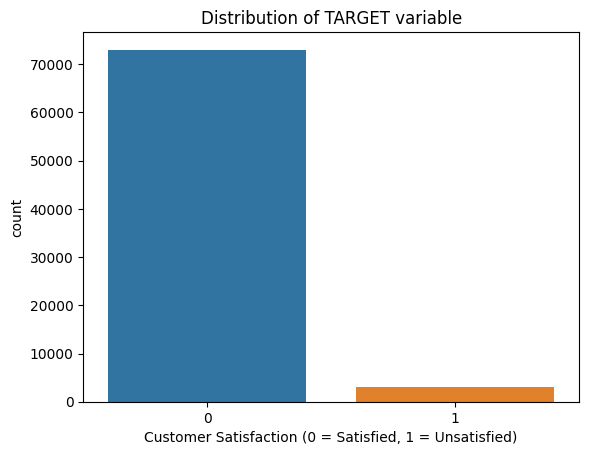

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load the dataset
# Make sure to replace 'path_to_train_data.csv' with the actual path to your data file
train = pd.read_csv('/kaggle/input/dataset3/TRAIN.csv')

# Now you can plot the count of the TARGET variable
sns.countplot(x='TARGET', data=train)
plt.title('Distribution of TARGET variable')
plt.xlabel('Customer Satisfaction (0 = Satisfied, 1 = Unsatisfied)')
plt.show()


In [14]:
# Finding the variables with zero variance
zero_variance = [col for col in train.columns if train[col].std() == 0]
print(f'Variables with zero variance: {zero_variance}')


Variables with zero variance: ['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']


In [15]:
# Calculating missing value percentages
missing_percent = train.isnull().mean() * 100
high_missing = missing_percent[missing_percent > 50].index.tolist()
print(f'Variables with >50% missing values: {high_missing}')

Variables with >50% missing values: []


In [17]:
import pandas as pd

# Load the test dataset
# Replace 'path_to_test_data.csv' with the actual path to your test data file
test = pd.read_csv('/kaggle/input/dataset3/TEST-Without TARGET.csv')

# Check for null values in the test dataset
print(test.isnull().sum())


ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace2    0
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
Length: 370, dtype: int64


In [18]:
# the correlation matrix
corr_matrix = train.corr().abs()

# Select upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.99
high_corr = [column for column in upper.columns if any(upper[column] > 0.99)]
print(f'Highly correlated variables: {high_corr}')


Highly correlated variables: ['imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var13_largo', 'ind_var13_medio', 'ind_var18', 'ind_var26', 'ind_var25', 'ind_var29_0', 'ind_var29', 'ind_var32', 'ind_var34', 'ind_var37', 'ind_var40_0', 'ind_var40', 'ind_var39', 'num_var1_0', 'num_var1', 'num_var5', 'num_var6_0', 'num_var6', 'num_var8_0', 'num_var8', 'num_var12', 'num_var13_corto_0', 'num_var13_corto', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0', 'num_var18', 'num_var20_0', 'num_var20', 'num_var24_0', 'num_var24', 'num_var26', 'num_var25', 'num_op_var39_hace2', 'num_var29_0', 'num_var29', 'num_var32', 'num_var34_0', 'num_var34', 'num_var37', 'num_var40_0', 'num_var40', 'num_var39', 'num_var44_0', 'num_var44', 'saldo_var18', 'saldo_var24', 'saldo_var29', 'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3', 'delta_num_aport_var13_1y3', 'delta_num_aport_var17_1y3', 'delta_num_aport_var33_1y3', 'delta_num_compra_var44_1y3', 'delta_num_reemb_var13_1

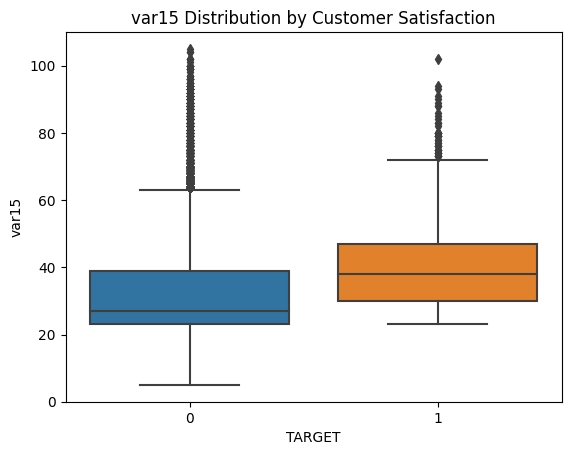

In [19]:
sns.boxplot(x='TARGET', y='var15', data=train)
plt.title('var15 Distribution by Customer Satisfaction')
plt.show()


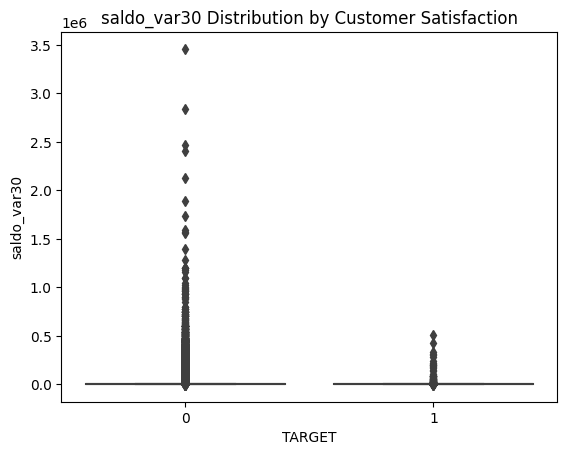

In [20]:
# Plotting the distribution of saldo_var30 by TARGET
sns.boxplot(x='TARGET', y='saldo_var30', data=train)
plt.title('saldo_var30 Distribution by Customer Satisfaction')
plt.show()


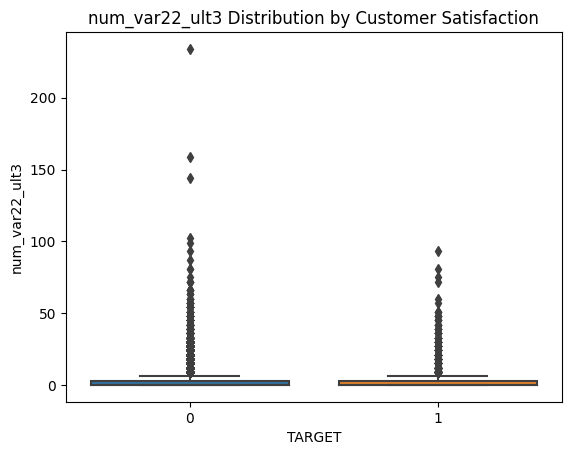

In [21]:
# Plotting the distribution of num_var22_ult3 by TARGET to analyze its relationship with customer satisfaction.
sns.boxplot(x='TARGET', y='num_var22_ult3', data=train)
plt.title('num_var22_ult3 Distribution by Customer Satisfaction')
plt.show()


In [22]:
# Preparing the data
X = train.drop(['TARGET', 'ID'], axis=1)
y = train['TARGET']

# Spliting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Baseline model
clf_baseline = DecisionTreeClassifier(random_state=42)
clf_baseline.fit(X_train, y_train)

# Predictions
y_pred_baseline = clf_baseline.predict_proba(X_val)[:,1]

# Evaluation
auc_baseline = roc_auc_score(y_val, y_pred_baseline)
print(f'Baseline Model AUC: {auc_baseline:.4f}')

Baseline Model AUC: 0.5749


In [23]:
# Model with limited depth
clf_depth = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_depth.fit(X_train, y_train)

# Predictions
y_pred_depth = clf_depth.predict_proba(X_val)[:,1]

# Evaluate
auc_depth = roc_auc_score(y_val, y_pred_depth)
print(f'Model with max_depth=5 AUC: {auc_depth:.4f}')

Model with max_depth=5 AUC: 0.8183


In [24]:
# Model using entropy criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

# Predictions
y_pred_entropy = clf_entropy.predict_proba(X_val)[:,1]

# Evaluate
auc_entropy = roc_auc_score(y_val, y_pred_entropy)
print(f'Model with criterion="entropy" AUC: {auc_entropy:.4f}')


Model with criterion="entropy" AUC: 0.5691


In [25]:
# Model with limited leaf nodes
clf_leaf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)
clf_leaf.fit(X_train, y_train)

# Predictions
y_pred_leaf = clf_leaf.predict_proba(X_val)[:,1]

# Evaluate
auc_leaf = roc_auc_score(y_val, y_pred_leaf)
print(f'Model with max_leaf_nodes=10 AUC: {auc_leaf:.4f}')


Model with max_leaf_nodes=10 AUC: 0.8054


In [26]:
# Trains the model and returns the AUC score on the validation set to evaluate performance.
def train_and_evaluate(model, X_train, y_train, X_val, y_val):
    # Train the model
    model.fit(X_train, y_train)
    # Predict probabilities
    y_pred = model.predict_proba(X_val)[:,1]
    # Calculate AUC
    auc = roc_auc_score(y_val, y_pred)
    return auc

In [27]:
# Make predictions on the test set
test_predictions = clf_depth.predict_proba(test.drop('ID', axis=1))[:,1]

# submission file
submission = pd.DataFrame({'ID': test['ID'], 'TARGET': test_predictions})
submission.to_csv('Nidhi_submission.csv', index=False)
